In [155]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [156]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [157]:
df=df.rename(columns={'Income($)':'Income'})

In [158]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


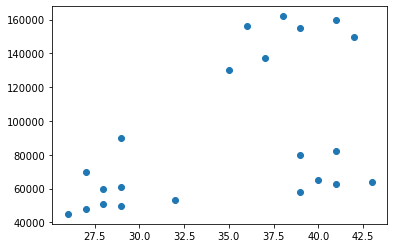

In [159]:
plt.scatter(df['Age'],df['Income'])

In [160]:
km=KMeans(n_clusters=3)

In [161]:
y_predicted=km.fit_predict(df[['Age','Income']])

In [162]:
df['cluster']=y_predicted

In [163]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [164]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Text(0, 0.5, 'Income')

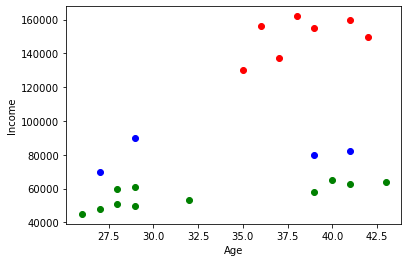

In [165]:
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [166]:
scaler=MinMaxScaler()

In [167]:
scaler.fit(df[['Income']])

MinMaxScaler()

In [168]:
df.Income=scaler.transform(df[['Income']])

In [169]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [170]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [171]:
df.Age=scaler.transform(df[['Age']])

In [172]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [173]:
y_predict=km.fit_predict(df[['Age','Income']])

In [174]:
df['clusters']=y_predict

In [185]:
df11=df.drop('cluster',axis='columns')

In [193]:
data1=df11[df11['clusters']==0]
data2=df11[df11['clusters']==1]
data3=df11[df11['clusters']==2]

In [200]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

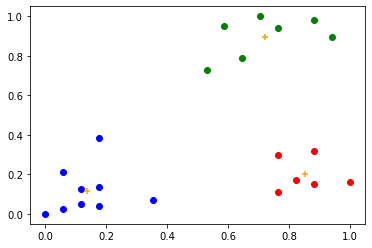

In [204]:
plt.scatter(data1.Age,data1.Income,color='green')
plt.scatter(data2.Age,data2.Income,color='blue')
plt.scatter(data3.Age,data3.Income,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='+')


In [210]:
k_rng=range(1,10)
sse=[]
for k in  k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

C:\Users\Rushabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [211]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22395807059250125,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

Text(0, 0.5, 'sse')

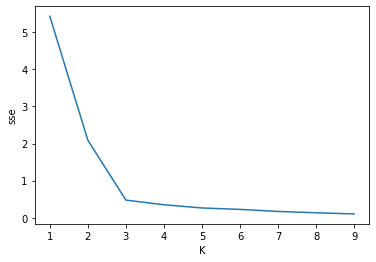

In [213]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('sse')